In [47]:
import pandas as pd
import seaborn as sns
from sklearn.compose    import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.pipeline   import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble  import RandomForestClassifier
from sklearn.metrics   import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [49]:
# 1. 데이터 로딩 및 전처리
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
data = pd.read_csv(url)
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [51]:
data.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [71]:
df = sns.load_dataset('penguins')
df = data.dropna()

In [73]:
X = df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','island','sex']]
y = df['species']

In [75]:
X = pd.get_dummies(X, columns=['island','sex'], drop_first=True)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [79]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # 훈련 데이터로 fit → transform
X_test_scaled  = scaler.transform(X_test)        # 같은 scaler로 test 데이터만 transform


In [81]:
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc  = le.transform(y_test)


In [83]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train_enc)

RandomForestClassifier(random_state=42)

In [85]:
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test_enc, y_pred, target_names=le.classes_))



              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



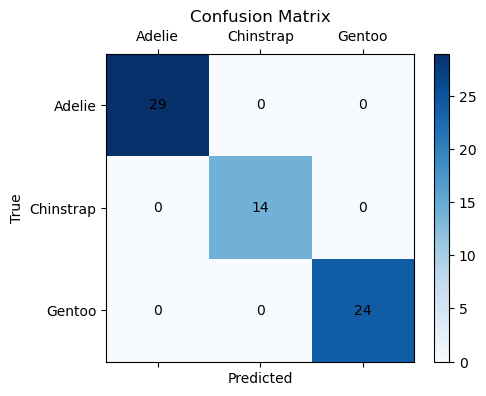

In [87]:
cm = confusion_matrix(y_test_enc, y_pred)
fig, ax = plt.subplots(figsize=(5,4))
cax = ax.matshow(cm, cmap='Blues')
for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, val, ha='center', va='center')
ax.set_xticks(range(len(le.classes_)))
ax.set_xticklabels(le.classes_)
ax.set_yticks(range(len(le.classes_)))
ax.set_yticklabels(le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.colorbar(cax)
plt.show()